In [83]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [84]:
z = torch.FloatTensor([1,2,3])

hypothesis = F.softmax(z, dim = 0)

print(hypothesis)
print(hypothesis.sum().item())

tensor([0.0900, 0.2447, 0.6652])
1.0


# softmax 함수는 기본적으로 확률로 변형시켜줄때 사용한다.
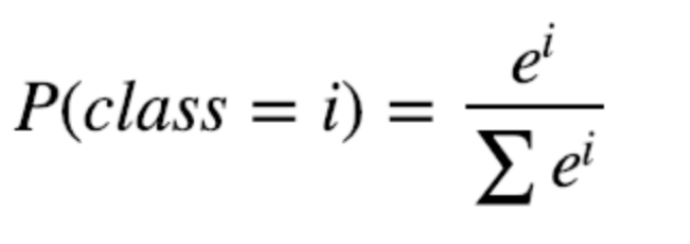

# 클래스가 여러개인 경우, Cross-entropy loss를 사용한다.
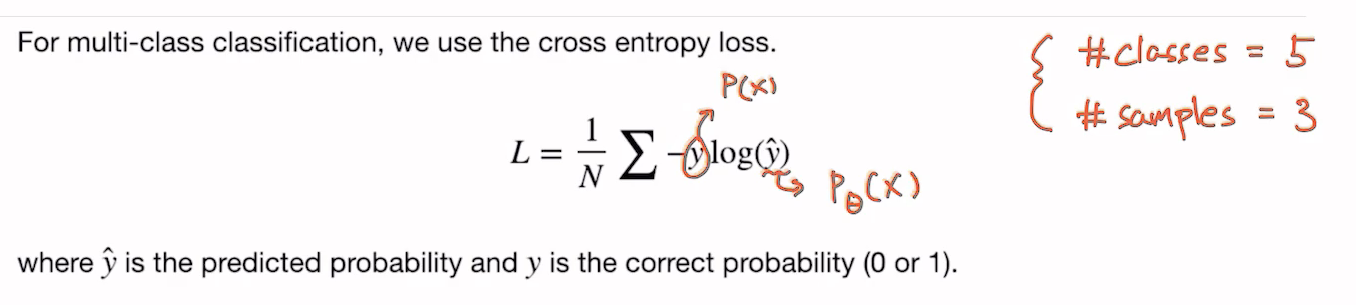

In [17]:
z = torch.rand(3,5, requires_grad = True)
hypothesis = F.softmax(z, dim = 1) # a*b에서 b값을 고정시키고 수행
print(hypothesis)


tensor([[0.2128, 0.2974, 0.2574, 0.1173, 0.1150],
        [0.1486, 0.2933, 0.1740, 0.2342, 0.1499],
        [0.2880, 0.1427, 0.2565, 0.1774, 0.1355]], grad_fn=<SoftmaxBackward>)


In [24]:
y = torch.randint(5,(3,)).long()
print(y)

tensor([4, 0, 1])


In [42]:
y_one_hot = torch.zeros_like(hypothesis)
y_one_hot.scatter_(1, y.unsqueeze(1), 1) # dim = 1, y.unsqueeze(1)

tensor([[0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.]])

In [54]:
src = torch.arange(1, 11).reshape((2, 5))
index = torch.tensor([[0, 1, 2, 0]])
torch.zeros(3, 5, dtype=src.dtype).scatter_(0, index, index)

tensor([[0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 2, 0, 0]])

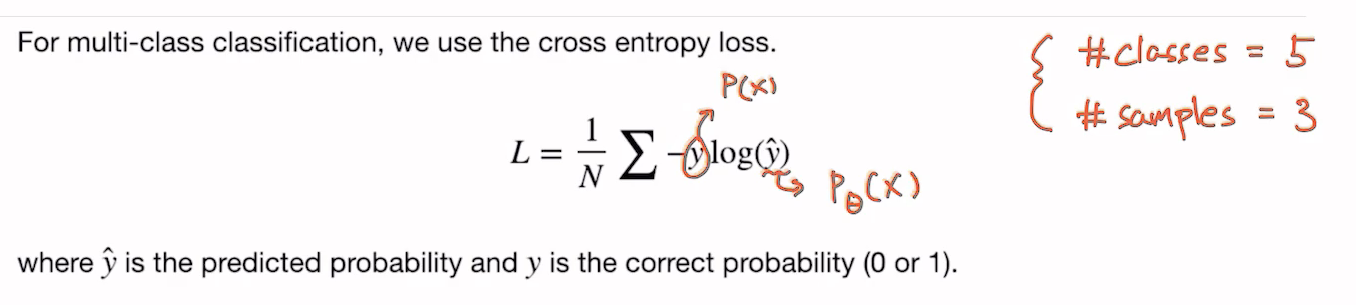

In [59]:
#cost구하기 -> Cross entropy
cost = (y_one_hot * -torch.log(hypothesis)).sum(dim = 1).mean()
print(cost)

tensor(2.0054, grad_fn=<MeanBackward0>)


In [60]:
(y_one_hot * -torch.log(hypothesis))

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 2.1624],
        [1.9067, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 1.9471, 0.0000, 0.0000, 0.0000]], grad_fn=<MulBackward0>)

In [62]:
(y_one_hot * -torch.log(hypothesis)).sum(dim=1)

tensor([2.1624, 1.9067, 1.9471], grad_fn=<SumBackward1>)

In [63]:
(y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()

tensor(2.0054, grad_fn=<MeanBackward0>)

# 파이토치에서는 관련 함수를 저장해놓음
- F.log_softmax
- F.nll_loss: negative-log-likelihood


In [64]:
F.nll_loss(F.log_softmax(z, dim = 1), y)

tensor(2.0054, grad_fn=<NllLossBackward>)

In [65]:
# z -> softmax -> log 취하기 (여기까지가 log(y_hat))
# y(one_hot vector)
# y*log(y_hat) -> sum -> mean

# 위에서 얘기된 모든 과정이 하나의 함수로 모두 만들어짐.
F.cross_entropy(z,y)

tensor(2.0054, grad_fn=<NllLossBackward>)

# 지금까지 배운걸 토대로 학습을 시도해보자.

In [68]:
x_train = [[1,2,1,1],
           [2,1,3,2],
           [3,1,3,4],
           [4,1,5,5],
           [1,7,5,5],
           [1,2,5,6],
           [1,6,6,6], 
           [1,7,7,7]]
y_train = [2,2,2,1,1,1,0,0] # 3개의 클래스에서 index를 의미한다. 예를들어 2를 사용하면 (0,0,1)
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

In [75]:
W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산 (1)
    hypothesis = F.softmax(x_train.matmul(W) + b, dim=1) # or .mm or @
    y_one_hot = torch.zeros_like(hypothesis)
    y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)
    cost = (y_one_hot * -torch.log(F.softmax(hypothesis, dim=1))).sum(dim=1).mean()

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.901535
Epoch  200/1000 Cost: 0.839114
Epoch  300/1000 Cost: 0.807826
Epoch  400/1000 Cost: 0.788472
Epoch  500/1000 Cost: 0.774822
Epoch  600/1000 Cost: 0.764449
Epoch  700/1000 Cost: 0.756191
Epoch  800/1000 Cost: 0.749398
Epoch  900/1000 Cost: 0.743671
Epoch 1000/1000 Cost: 0.738749


In [92]:
# 모델초기화
w = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer설정
optimizer = optim.SGD([W, b], lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs+1):
    # cost계산
    hypothesis = F.softmax(x_train.matmul(W) + b, dim=1) # or .mm or @
    y_one_hot = torch.zeros_like(hypothesis)
    y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)
    cost = (y_one_hot* - torch.log(F.softmax(hypothesis, dim = 1))).sum(dim=1).mean()
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch,nb_epochs, cost.item()))


Epoch    0/1000 Cost: 0.715112
Epoch  100/1000 Cost: 0.696306
Epoch  200/1000 Cost: 0.693418
Epoch  300/1000 Cost: 0.690634
Epoch  400/1000 Cost: 0.687949
Epoch  500/1000 Cost: 0.685358
Epoch  600/1000 Cost: 0.682859
Epoch  700/1000 Cost: 0.680449
Epoch  800/1000 Cost: 0.678125
Epoch  900/1000 Cost: 0.675882
Epoch 1000/1000 Cost: 0.673719


# pytorch 사용하기

In [91]:
# 모델초기화
w = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer설정
optimizer = optim.SGD([W, b], lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs+1):
    # cost계산
#     hypothesis = F.softmax(x_train.matmul(W) + b, dim=1) # or .mm or @
#     y_one_hot = torch.zeros_like(hypothesis)
#     y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)
#     cost = (y_one_hot* - torch.log(F.softmax(hypothesis, dim = 1))).sum(dim=1).mean()
    
    # 개선된 식
    z = x_train.matmul(W) + b
    cost = F.cross_entropy(z, y_train) # softmax, nll(negative-log-likelihood)
    
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch,nb_epochs, cost.item()))


Epoch    0/1000 Cost: 6.635344
Epoch  100/1000 Cost: 1.667699
Epoch  200/1000 Cost: 0.890326
Epoch  300/1000 Cost: 0.415170
Epoch  400/1000 Cost: 0.445854
Epoch  500/1000 Cost: 0.408188
Epoch  600/1000 Cost: 0.377686
Epoch  700/1000 Cost: 0.350541
Epoch  800/1000 Cost: 0.324823
Epoch  900/1000 Cost: 0.299313
Epoch 1000/1000 Cost: 0.273162


# High-level implementation with nn.Module

In [120]:
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(4,3)
        
        
    def forward(self,x):
        return self.linear(x)
model = SoftmaxClassifierModel()

In [121]:
optimizer = optim.SGD(model.parameters(), lr = 1e-1)


In [122]:
'''

x_train = (m * 4) --> 4는 데이터의 특성개수 의미
pred = (m * 3) --> 3은 클래스의 개수 의미
y_train = (m,) --> 클래스에 해당하는 index 정보를 담고 있음.

'''

n_epoch = 1000
for epoch in range(n_epoch+1):
    # H(x) 계산하기
    hypothesis = model(x_train)
    cost = F.cross_entropy(hypothesis, y_train)
    
    # backprop
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 출력
    if epoch % 100 == 0:
        pred = torch.argmax(F.softmax(hypothesis, dim = 1),dim=1) # class별 확률을 구하고, 그중 제일 큰 index로 변환
        acc =(pred == y_train).float().sum().item() / len(y_train) * 100

        print('Epoch {:4d}/{} Cost: {:.6f}, acc: {}'.format(
            epoch,n_epoch, cost.item(), acc))

        

Epoch    0/1000 Cost: 2.637636, acc: 25.0
Epoch  100/1000 Cost: 0.647903, acc: 62.5
Epoch  200/1000 Cost: 0.564643, acc: 62.5
Epoch  300/1000 Cost: 0.511043, acc: 75.0
Epoch  400/1000 Cost: 0.467249, acc: 75.0
Epoch  500/1000 Cost: 0.428280, acc: 75.0
Epoch  600/1000 Cost: 0.391924, acc: 75.0
Epoch  700/1000 Cost: 0.356742, acc: 87.5
Epoch  800/1000 Cost: 0.321577, acc: 87.5
Epoch  900/1000 Cost: 0.285617, acc: 100.0
Epoch 1000/1000 Cost: 0.250818, acc: 100.0


# classifcation 과정에서
- class의 개수가 두개이면 --> logisitc regression에서 사용한 binary cross entorpy로 loss 사용한다

- class의 개수가 여러개이면 --> softmax 에서 사용한 cross entropy 사용한다. 